In [1]:
%pip install discopula

Note: you may need to restart the kernel to use updated packages.


> Make sure to have discopula's latest version installed using `pip`. More information about the latest version can be found at https://pypi.org/project/discopula/

In [2]:
import numpy as np
from discopula import (
    bootstrap_ccram,
    permutation_test_ccram,
    bootstrap_predict_category_summary,
    display_prediction_summary
)
from discopula import GenericCheckerboardCopula

# 2-Dimensional Case 

### Create Sample Contingency Table and Initialize the GenericCheckerboardCopula

In the case of initialization of a `GenericCheckerboardCopula` object with a contingency table (`np.array(np.array(...))`), the axis indexing defaults to the outermost starting with 0. In this case of a 2D contingency table, `axis = 0` has 5 categories and `axis = 1` has 3 categories. According to the JMA2021 paper, we have $X_1$ at `axis = 0` and $X_2$ at `axis = 1`.

In [3]:
contingency_table = np.array([
    [0, 0, 20],
    [0, 10, 0],
    [20, 0, 0],
    [0, 10, 0],
    [0, 0, 20]
])
copula = GenericCheckerboardCopula.from_contingency_table(contingency_table)
print(f"Shape of the inferred joint probability matrix P: {copula.P.shape}")
print(f"Probability matrix P:\n{copula.P}")

Shape of the inferred joint probability matrix P: (5, 3)
Probability matrix P:
[[0.    0.    0.25 ]
 [0.    0.125 0.   ]
 [0.25  0.    0.   ]
 [0.    0.125 0.   ]
 [0.    0.    0.25 ]]


### Bootstrapping CCRAM & SCCRAM Metrics

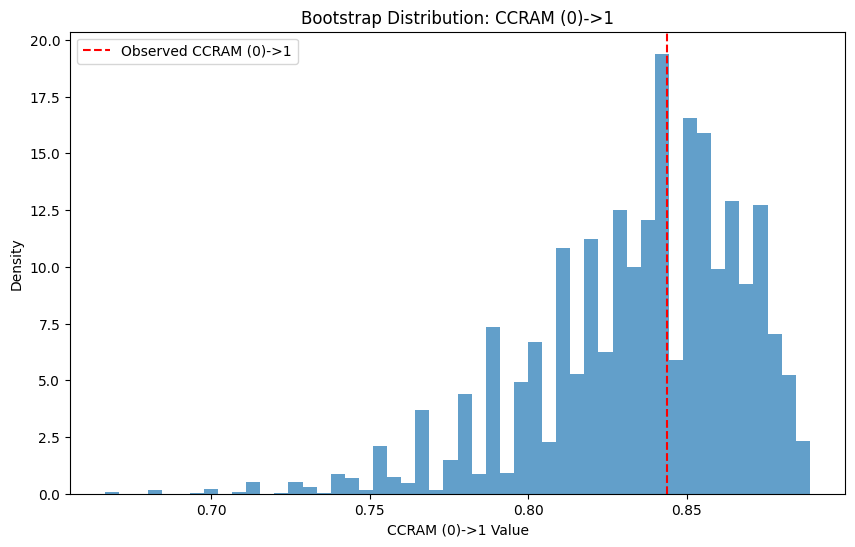

In [4]:
ccram_result = bootstrap_ccram(
    contingency_table,
    from_axes=[0],
    to_axis=1,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [5]:
print(f"Metric Name: {ccram_result.metric_name}")
print(f"Observed Value: {ccram_result.observed_value:.4f}")
print(f"95% CI: ({ccram_result.confidence_interval[0]:.4f}, {ccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {ccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(ccram_result.bootstrap_distribution)}")

Metric Name: CCRAM (0)->1
Observed Value: 0.8438
95% CI: (0.7553, 0.8817)
Standard Error: 0.0325
Bootstrap Distribution: <class 'numpy.ndarray'>


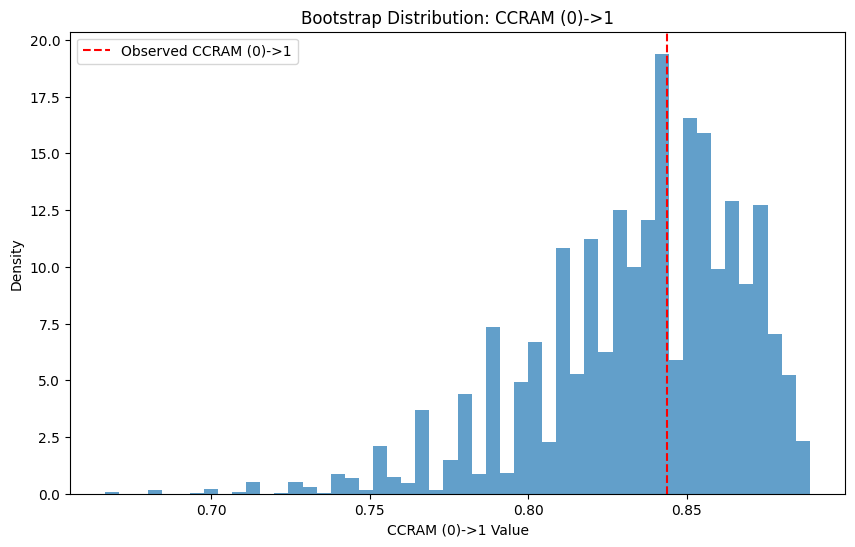

In [6]:
ccram_result.histogram_fig

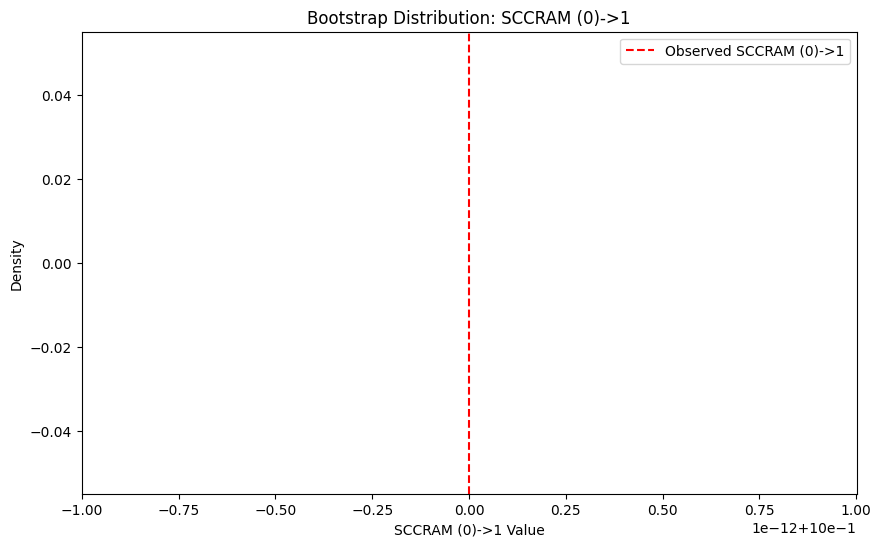

In [8]:
sccram_result = bootstrap_ccram(
    contingency_table,
    from_axes=[0],
    to_axis=1,
    scaled=True,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [9]:
print(f"Metric Name: {sccram_result.metric_name}")
print(f"Observed Value: {sccram_result.observed_value:.4f}")
print(f"95% CI: ({sccram_result.confidence_interval[0]:.4f}, {sccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {sccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(sccram_result.bootstrap_distribution)}")

Metric Name: SCCRAM (0)->1
Observed Value: 1.0000
95% CI: (1.0000, 1.0000)
Standard Error: 0.0000
Bootstrap Distribution: <class 'numpy.ndarray'>


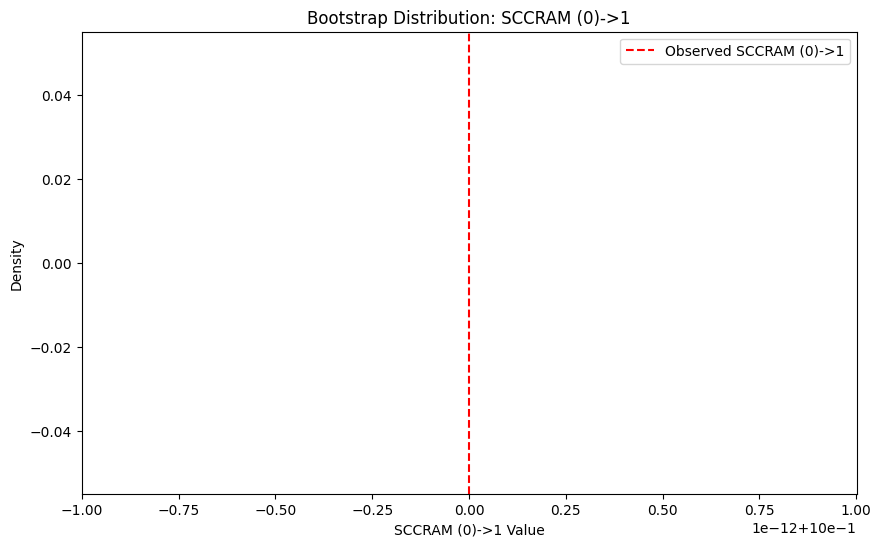

In [10]:
sccram_result.histogram_fig

### Bootstrap Prediction of Categories through Checkerboard Copula Regression

In [13]:
prediction_matrix = bootstrap_predict_category_summary(
    contingency_table,
    from_axes=[0],
    to_axis=1,
    n_resamples=99999
)
print("\nPrediction Matrix:")
print(prediction_matrix)


Prediction Matrix:
(array([[0.00000e+00, 0.00000e+00, 1.00000e+02, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 9.99960e+01, 0.00000e+00, 1.00000e+02, 0.00000e+00],
       [1.00000e+02, 4.00004e-03, 0.00000e+00, 0.00000e+00, 1.00000e+02]]), [5])


In [14]:
display_prediction_summary(
    summary_matrix=prediction_matrix[0],
    source_dims=prediction_matrix[1],
    from_axes_names=["X"],
    to_axis_name="Y"
)


Prediction Summary (% of bootstrap samples)
--------------------------------------------------
       X=0    X=1    X=2    X=3    X=4
Y=0   0.0%   0.0% 100.0%   0.0%   0.0%
Y=1   0.0% 100.0%   0.0% 100.0%   0.0%
Y=2 100.0%   0.0%   0.0%   0.0% 100.0%
--------------------------------------------------


### Permutation Testing for CCRAM & SCCRAM Metrics

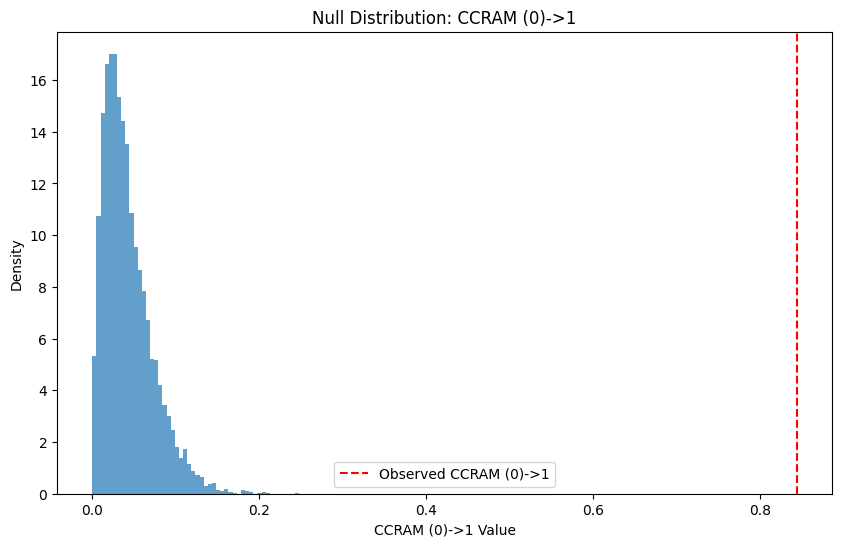

In [15]:
perm_result = permutation_test_ccram(
    contingency_table,
    from_axes=[0],
    to_axis=1,
    alternative='greater',
    n_resamples=9999
)

In [16]:
print(f"Metric Name: {perm_result.metric_name}")
print(f"Observed Value: {perm_result.observed_value:.4f}")
print(f"P-Value: {perm_result.p_value:.4f}")
print(f"Null Distribution: {type(perm_result.null_distribution)}")

Metric Name: CCRAM (0)->1
Observed Value: 0.8438
P-Value: 0.0001
Null Distribution: <class 'numpy.ndarray'>


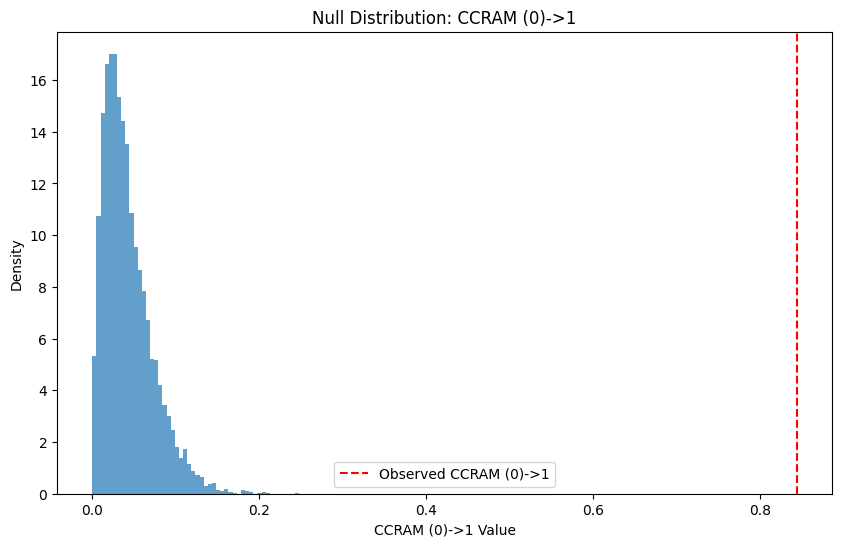

In [17]:
perm_result.histogram_fig

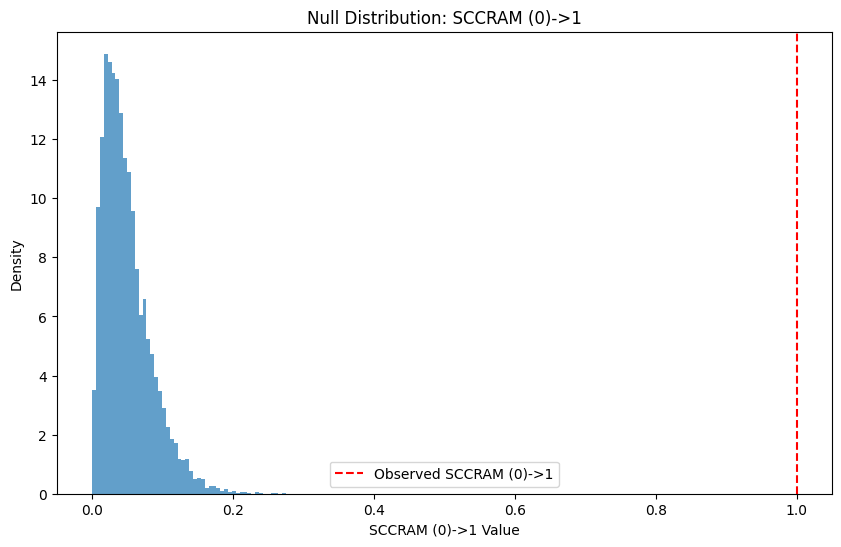

In [18]:
scaled_perm_result = permutation_test_ccram(
    contingency_table,
    from_axes=[0],
    to_axis=1,
    scaled=True,
    alternative='greater',
    n_resamples=9999
)

In [19]:
print(f"Metric Name: {scaled_perm_result.metric_name}")
print(f"Observed Value: {scaled_perm_result.observed_value:.4f}")
print(f"P-Value: {scaled_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(scaled_perm_result.null_distribution)}")

Metric Name: SCCRAM (0)->1
Observed Value: 1.0000
P-Value: 0.0001
Null Distribution: <class 'numpy.ndarray'>


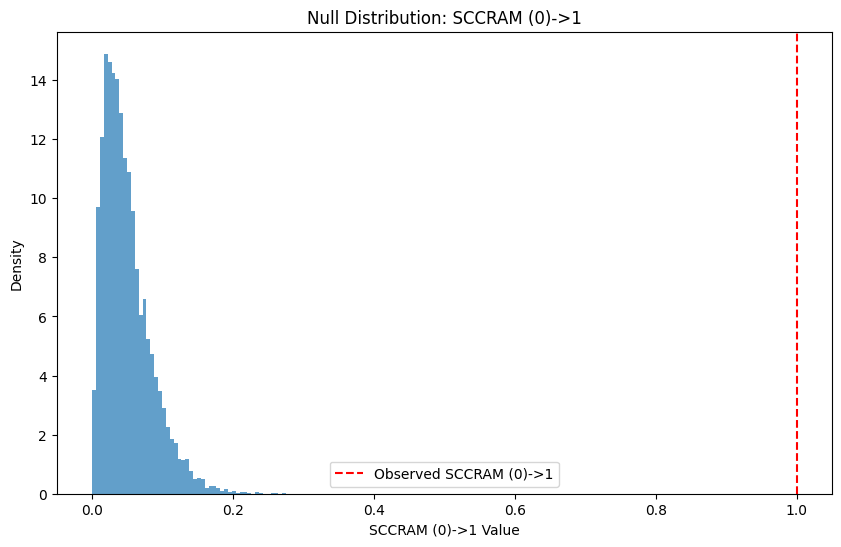

In [20]:
scaled_perm_result.histogram_fig

# 4-Dimensional Case (Real Data Analysis from JMA2021)

### Create Sample Data in Cases Form and Initialize the GenericCheckerboardCopula

In the case of initialization of a `GenericCheckerboardCopula` object with cases data (`np.array(np.array())`), the axis indexing defaults to the outermost starting with 0. In this case of 4D cases, as mentioned by the `shape` parameter: `axis = 0` has 2 categories, `axis = 1` has 3 categories, `axis = 2` has 2 categories, and `axis = 3` has 6 categories. According to the JMA2021 paper, we have $X_1$ at `axis = 0`, $X_2$ at `axis = 1`, $X_3$ at `axis = 2`, and $X_4$ at `axis = 3`.

In [21]:
real_cases_data = np.array([
    # RDA Row 1
    [0,2,0,1],[0,2,0,4],[0,2,0,4],
    [0,2,0,5], [0,2,0,5],[0,2,0,5],[0,2,0,5],
    # RDA Row 2
    [0,2,1,3],[0,2,1,4],[0,2,1,4],[0,2,1,4],
    # RDA Row 3
    [0,1,0,1],[0,1,0,1],[0,1,0,2],[0,1,0,2],[0,1,0,2],
    [0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],[0,1,0,4],
    [0,1,0,5],[0,1,0,5],[0,1,0,5],[0,1,0,5],[0,1,0,5],[0,1,0,5],
    # RDA Row 4
    [0,1,1,1],[0,1,1,3],[0,1,1,3],[0,1,1,5],
    # RDA Row 5
    [0,0,0,4],[0,0,0,4],[0,0,0,5],[0,0,0,5],
    # RDA Row 6
    [0,0,1,2],[0,0,1,3],[0,0,1,4],[0,0,1,4],[0,0,1,4],
    # RDA Row 7
    [1,2,0,2],[1,2,0,2],[1,2,0,2],[1,2,0,4],[1,2,0,5],[1,2,0,5],
    # RDA Row 8
    [1,2,1,1],[1,2,1,4],[1,2,1,4],[1,2,1,4],
    # RDA Row 9
    [1,1,0,1],[1,1,0,1],[1,1,0,1],[1,1,0,2],[1,1,0,2],[1,1,0,2],[1,1,0,2],
    [1,1,0,3],[1,1,0,3],[1,1,0,3],[1,1,0,3],[1,1,0,3],
    [1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],[1,1,0,4],
    [1,1,0,5],[1,1,0,5],
    # RDA Row 10
    [1,1,1,0],[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1],
    [1,1,1,2],[1,1,1,2],[1,1,1,2],[1,1,1,2],
    [1,1,1,3],[1,1,1,3],[1,1,1,3],[1,1,1,5],
    # RDA Row 11
    [1,0,0,0],[1,0,0,0],[1,0,0,1],[1,0,0,1],[1,0,0,2],
    [1,0,0,3],[1,0,0,3],[1,0,0,3],[1,0,0,3],[1,0,0,3],
    [1,0,0,4],[1,0,0,4],
    # RDA Row 12
    [1,0,1,0],[1,0,1,0],[1,0,1,2],[1,0,1,2],
    [1,0,1,3],[1,0,1,3],[1,0,1,3]
])
rda_copula = GenericCheckerboardCopula.from_cases(cases=real_cases_data, shape=(2,3,2,6))
print(f"Shape of the inferred joint probability matrix P: {rda_copula.P.shape}")
print(f"Probability matrix P:\n{rda_copula.P}\n")
print(f"Marginal pdfs:\n{rda_copula.marginal_pdfs}\n")
print(f"Marginal cdfs:\n{rda_copula.marginal_cdfs}")

Shape of the inferred joint probability matrix P: (2, 3, 2, 6)
Probability matrix P:
[[[[0.         0.         0.         0.         0.01941748 0.01941748]
   [0.         0.         0.00970874 0.00970874 0.02912621 0.        ]]

  [[0.         0.01941748 0.02912621 0.         0.05825243 0.05825243]
   [0.         0.00970874 0.         0.01941748 0.         0.00970874]]

  [[0.         0.00970874 0.         0.         0.01941748 0.03883495]
   [0.         0.         0.         0.00970874 0.02912621 0.        ]]]


 [[[0.01941748 0.01941748 0.00970874 0.04854369 0.01941748 0.        ]
   [0.01941748 0.         0.01941748 0.02912621 0.         0.        ]]

  [[0.         0.02912621 0.03883495 0.04854369 0.05825243 0.01941748]
   [0.00970874 0.03883495 0.03883495 0.02912621 0.         0.00970874]]

  [[0.         0.         0.02912621 0.         0.00970874 0.01941748]
   [0.         0.00970874 0.         0.         0.02912621 0.        ]]]]

Marginal pdfs:
{0: array([0.39805825, 0.6019417

In [22]:
rda_contingency_table = rda_copula.contingency_table
print(f"Shape of the inferred contingency table: {rda_contingency_table.shape}")
print(f"Contingency Table:\n{rda_contingency_table}")

Shape of the inferred contingency table: (2, 3, 2, 6)
Contingency Table:
[[[[0 0 0 0 2 2]
   [0 0 1 1 3 0]]

  [[0 2 3 0 6 6]
   [0 1 0 2 0 1]]

  [[0 1 0 0 2 4]
   [0 0 0 1 3 0]]]


 [[[2 2 1 5 2 0]
   [2 0 2 3 0 0]]

  [[0 3 4 5 6 2]
   [1 4 4 3 0 1]]

  [[0 0 3 0 1 2]
   [0 1 0 0 3 0]]]]


### Bootstrapping CCRAM & SCCRAM Metrics

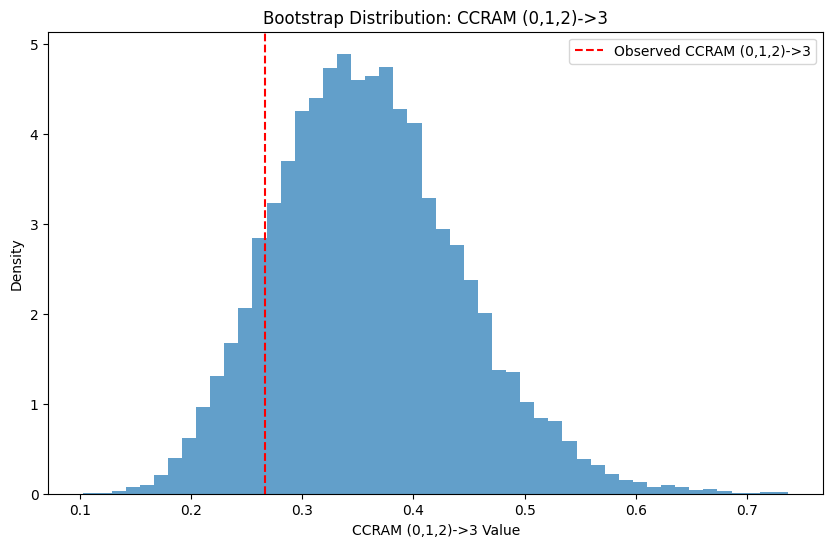

In [23]:
rda_ccram_result = bootstrap_ccram(
    rda_contingency_table,
    from_axes=[0, 1, 2],
    to_axis=3,
    confidence_level=0.95,
    method="percentile",
    n_resamples=9999
)

In [24]:
print(f"Metric Name: {rda_ccram_result.metric_name}")
print(f"Observed Value: {rda_ccram_result.observed_value:.4f}")
print(f"95% CI: ({rda_ccram_result.confidence_interval[0]:.4f}, {rda_ccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {rda_ccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(rda_ccram_result.bootstrap_distribution)}")

Metric Name: CCRAM (0,1,2)->3
Observed Value: 0.2663
95% CI: (0.2117, 0.5396)
Standard Error: 0.0839
Bootstrap Distribution: <class 'numpy.ndarray'>


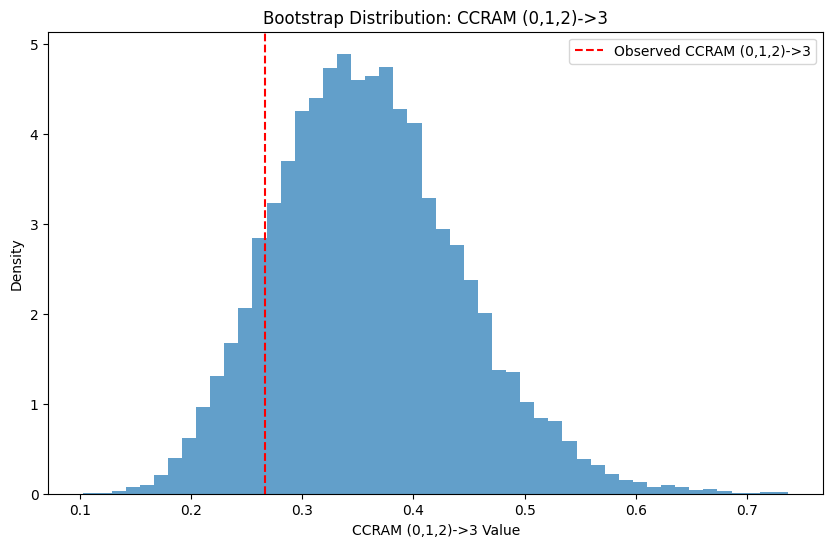

In [25]:
rda_ccram_result.histogram_fig

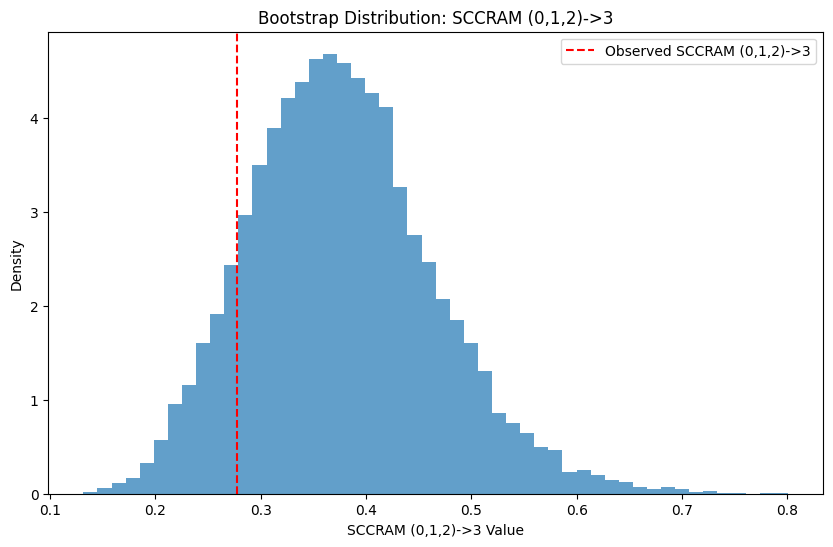

In [26]:
rda_sccram_result = bootstrap_ccram(
    rda_contingency_table,
    from_axes=[0, 1, 2],
    to_axis=3,
    confidence_level=0.95,
    scaled=True,
    method="percentile",
    n_resamples=9999
)

In [27]:
print(f"Metric Name: {rda_sccram_result.metric_name}")
print(f"Observed Value: {rda_sccram_result.observed_value:.4f}")
print(f"95% CI: ({rda_sccram_result.confidence_interval[0]:.4f}, {rda_sccram_result.confidence_interval[1]:.4f})")
print(f"Standard Error: {rda_sccram_result.standard_error:.4f}")
print(f"Bootstrap Distribution: {type(rda_sccram_result.bootstrap_distribution)}")

Metric Name: SCCRAM (0,1,2)->3
Observed Value: 0.2776
95% CI: (0.2213, 0.5678)
Standard Error: 0.0880
Bootstrap Distribution: <class 'numpy.ndarray'>


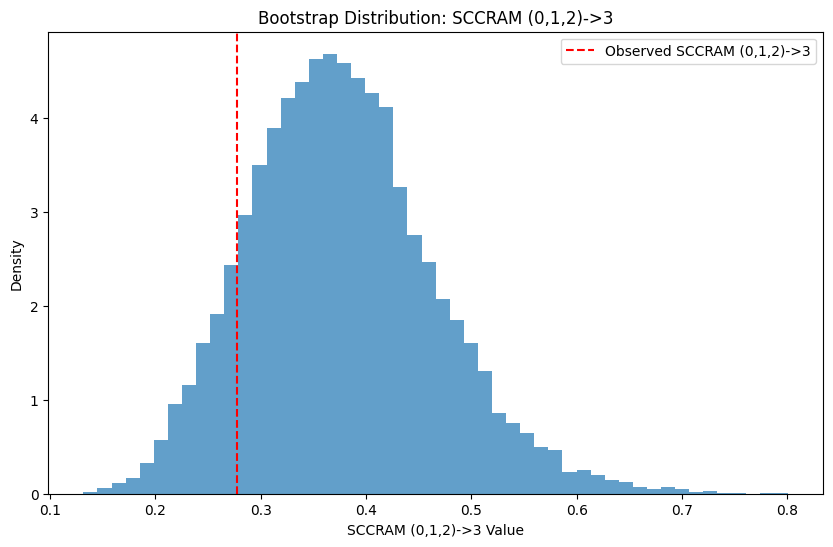

In [28]:
rda_sccram_result.histogram_fig

### Bootstrap Prediction of Categories through Checkerboard Copula Regression

In [29]:
rda_prediction_matrix = bootstrap_predict_category_summary(
    rda_contingency_table,
    from_axes=[0, 1, 2],
    to_axis=3,
    n_resamples=9999
)
print("\nPrediction Matrix:")
print(rda_prediction_matrix)

/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:227: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/numpy/_core/_methods.py:216: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



Prediction Matrix:
(array([[[[1.61016102e+00, 0.00000000e+00],
         [1.00010001e-01, 1.00010001e-02],
         [0.00000000e+00, 1.40014001e-01]],

        [[5.60056006e-01, 1.65016502e+00],
         [1.60016002e+00, 7.30073007e-01],
         [0.00000000e+00, 1.88018802e+00]]],


       [[[0.00000000e+00, 0.00000000e+00],
         [7.00070007e-02, 1.75017502e+00],
         [0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 3.37033703e+00],
         [0.00000000e+00, 1.09310931e+01],
         [4.50045005e+00, 3.44034403e+00]]],


       [[[0.00000000e+00, 1.70017002e-01],
         [4.60046005e-01, 5.15051505e+01],
         [2.82028203e+00, 7.56075608e+00]],

        [[2.29022902e+00, 1.77517752e+01],
         [0.00000000e+00, 7.24972497e+01],
         [7.63676368e+01, 7.13071307e+00]]],


       [[[0.00000000e+00, 1.86318632e+01],
         [6.44064406e+00, 4.62846285e+01],
         [8.17081708e+01, 4.19741974e+01]],

        [[4.34043404e+01, 4.65546555e+01],
         [1.1

In [30]:
display_prediction_summary(
    summary_matrix=rda_prediction_matrix[0],
    source_dims=rda_prediction_matrix[1],
    from_axes_names=["X1", "X2", "X3"],
    to_axis_name="X4"
)


Prediction Summary (% of bootstrap samples)
--------------------------------------------------
       X1=0                                      X1=1                                   
       X2=0          X2=1          X2=2          X2=0          X2=1          X2=2       
       X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1   X3=0   X3=1
X4=0   1.6%   0.0%   0.1%   0.0%   0.0%   0.1%   0.6%   1.7%   1.6%   0.7%   0.0%   1.9%
X4=1   0.0%   0.0%   0.1%   1.8%   0.0%   0.0%   0.0%   3.4%   0.0%  10.9%   4.5%   3.4%
X4=2   0.0%   0.2%   0.5%  51.5%   2.8%   7.6%   2.3%  17.8%   0.0%  72.5%  76.4%   7.1%
X4=3   0.0%  18.6%   6.4%  46.3%  81.7%  42.0%  43.4%  46.6%  11.2%  15.8%  18.9%  36.4%
X4=4  64.5%  80.8%  68.8%   0.5%  15.5%  47.3%  53.7%  27.2%  87.2%   0.0%   0.2%  51.1%
X4=5  33.9%   0.4%  24.1%   0.0%   0.0%   3.0%   0.0%   3.5%   0.0%   0.0%   0.0%   0.0%
--------------------------------------------------


### Permutation Testing for CCRAM & SCCRAM Metrics

/opt/anaconda3/envs/discopula/lib/python3.13/site-packages/scipy/stats/_resampling.py:1498: RuntimeWarning: overflow encountered in scalar power
  n_max = factorial(n_obs_sample)**n_samples


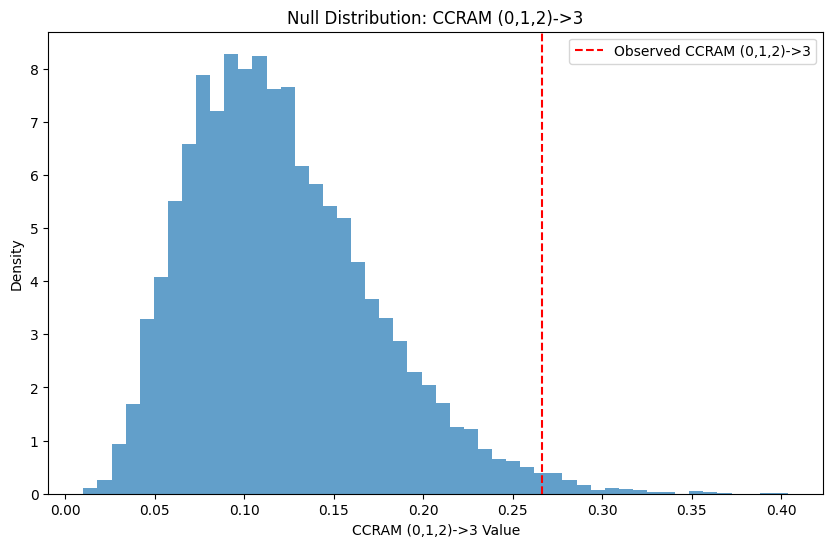

In [31]:
rda_perm_result = permutation_test_ccram(
    rda_contingency_table,
    from_axes=[0, 1, 2],
    to_axis=3,
    alternative='greater',
    n_resamples=9999
)

In [32]:
print(f"Metric Name: {rda_perm_result.metric_name}")
print(f"Observed Value: {rda_perm_result.observed_value:.4f}")
print(f"P-Value: {rda_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(rda_perm_result.null_distribution)}")

Metric Name: CCRAM (0,1,2)->3
Observed Value: 0.2663
P-Value: 0.0118
Null Distribution: <class 'numpy.ndarray'>


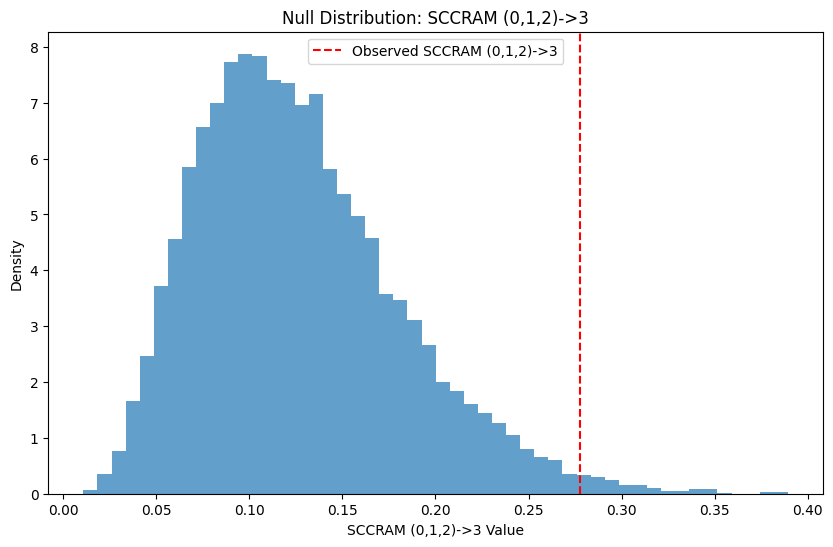

In [33]:
rda_scaled_perm_result = permutation_test_ccram(
    rda_contingency_table,
    from_axes=[0, 1, 2],
    to_axis=3,
    scaled=True,
    alternative='greater',
    n_resamples=9999
)

In [34]:
print(f"Metric Name: {rda_scaled_perm_result.metric_name}")
print(f"Observed Value: {rda_scaled_perm_result.observed_value:.4f}")
print(f"P-Value: {rda_scaled_perm_result.p_value:.4f}")
print(f"Null Distribution: {type(rda_scaled_perm_result.null_distribution)}")

Metric Name: SCCRAM (0,1,2)->3
Observed Value: 0.2776
P-Value: 0.0119
Null Distribution: <class 'numpy.ndarray'>
